In [28]:
#Initializations and reading in dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
usdf = pd.read_csv('C:/Datascience/US_youtube_trending_data.csv')
jpndf = pd.read_csv('C:/Datascience/JP_youtube_trending_data.csv')
dedf = pd.read_csv('C:/Datascience/DE_youtube_trending_data.csv')
ukdf = pd.read_csv('C:/Datascience/GB_youtube_trending_data.csv')
usdf.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [29]:
#Checking number of rows
usdf.shape[0]

171990

In [30]:
#Removing duplicate videos (As videos can trend more than once)
usdf.drop_duplicates(subset=['video_id'], keep='last', inplace=True)
dedf.drop_duplicates(subset=['video_id'], keep='last', inplace=True)
ukdf.drop_duplicates(subset=['video_id'], keep='last', inplace=True)
jpndf.drop_duplicates(subset=['video_id'], keep='last', inplace=True)

In [31]:
#Checking new number of rows after dropping duplicates
usdf.shape[0]

31710

In [32]:
#Checking null values for columns in consideration; expected to be 0 since the data gathered is automated from YouTube
print((usdf['publishedAt'].isnull()).sum(),(usdf['categoryId'].isnull()).sum(),(usdf['video_id'].isnull()).sum())

0 0 0


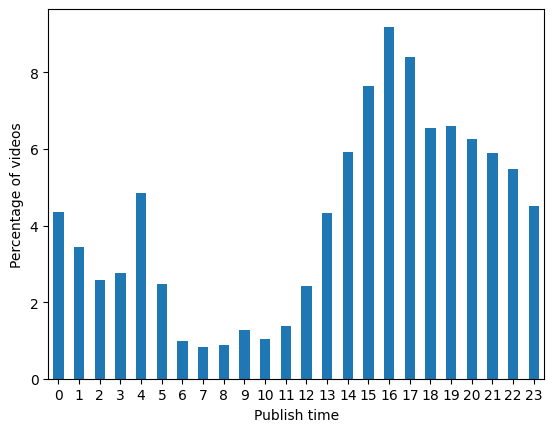

In [33]:
#Analyzing the publish hour 

#Changing type to datetime
timetest=pd.to_datetime(usdf['publishedAt'])

#Extracting hour from datetime
hours= timetest.dt.hour.sort_values().value_counts().sort_index().head(24)

#Plotting percentage of videos published at each hour
((hours/hours.sum())*100).plot.bar(ylabel='Percentage of videos', xlabel='Publish time')
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 0)

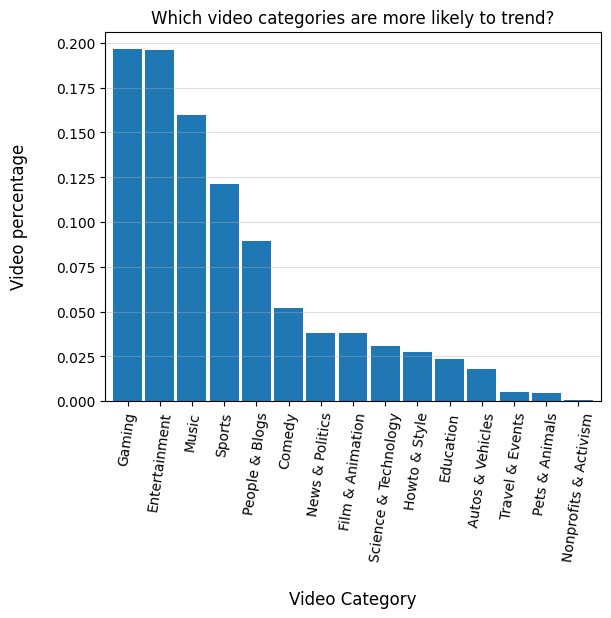

In [34]:
#Analyzing which categories are the most popular among trending videos

#Replacing category Ids with actual names for better representation
usdf['categoryId'].replace(1, 'Film & Animation', inplace=True)
usdf['categoryId'].replace(2, 'Autos & Vehicles', inplace=True)
usdf['categoryId'].replace(10, 'Music', inplace=True)
usdf['categoryId'].replace(15, 'Pets & Animals', inplace=True)
usdf['categoryId'].replace(17, 'Sports', inplace=True)
usdf['categoryId'].replace(19, 'Travel & Events', inplace=True)
usdf['categoryId'].replace(20, 'Gaming', inplace=True)
usdf['categoryId'].replace(22, 'People & Blogs', inplace=True)
usdf['categoryId'].replace(23, 'Comedy', inplace=True)
usdf['categoryId'].replace(24, 'Entertainment', inplace=True)
usdf['categoryId'].replace(25, 'News & Politics', inplace=True)
usdf['categoryId'].replace(26, 'Howto & Style', inplace=True)
usdf['categoryId'].replace(27, 'Education', inplace=True)
usdf['categoryId'].replace(28, 'Science & Technology', inplace=True)
usdf['categoryId'].replace(29, 'Nonprofits & Activism', inplace=True)

#Calculating percentage of each category and ploting
(usdf['categoryId'].value_counts()/usdf.shape[0]).plot.bar(width = 0.9, title= 'Which video categories are more likely to trend?')
#Modifying labels/axis
plt.xlabel('Video Category', fontsize=12, labelpad=20)
plt.ylabel('Video percentage', fontsize = 12, labelpad= 20)
plt.grid(axis='y', alpha=0.4)
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 82)

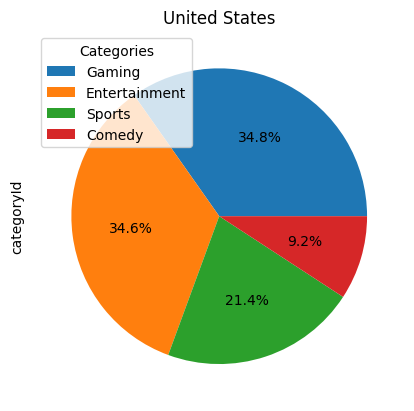

In [35]:
#Plotting the top 4 most popular categories relative to eachother for the US
new_df= usdf.loc[usdf['categoryId'].isin(['Comedy','Sports','Gaming','Entertainment'])]
vals= new_df['categoryId'].value_counts()
#Plotting pie chart and adding legend
((vals/usdf.shape[0])*100).plot.pie(labels=None, autopct='%1.1f%%')
plt.title("United States")
plt.legend([ 'Gaming','Entertainment','Sports','Comedy'], title = 'Categories', loc='upper left');

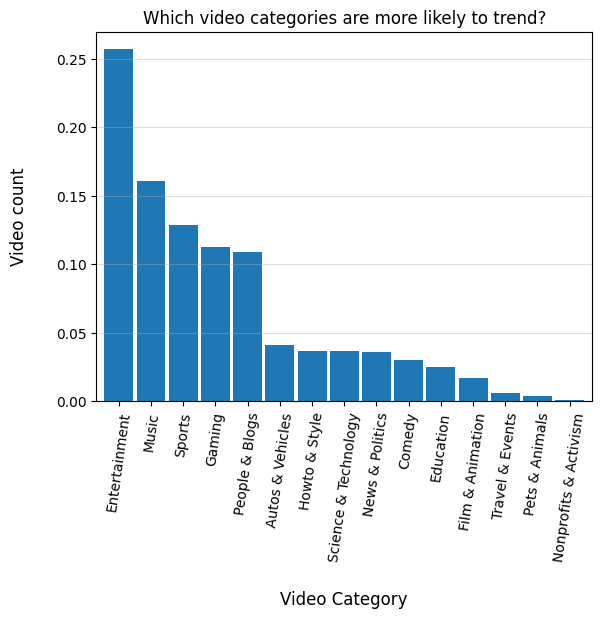

In [36]:
#Doing the exact same methods for UK, Germany, Japan regions

#There's definitly a more pythonic way of replacing the Ids but incase the json file is not available
dedf['categoryId'].replace(1, 'Film & Animation', inplace=True)
dedf['categoryId'].replace(2, 'Autos & Vehicles', inplace=True)
dedf['categoryId'].replace(10, 'Music', inplace=True)
dedf['categoryId'].replace(15, 'Pets & Animals', inplace=True)
dedf['categoryId'].replace(17, 'Sports', inplace=True)
dedf['categoryId'].replace(19, 'Travel & Events', inplace=True)
dedf['categoryId'].replace(20, 'Gaming', inplace=True)
dedf['categoryId'].replace(22, 'People & Blogs', inplace=True)
dedf['categoryId'].replace(23, 'Comedy', inplace=True)
dedf['categoryId'].replace(24, 'Entertainment', inplace=True)
dedf['categoryId'].replace(25, 'News & Politics', inplace=True)
dedf['categoryId'].replace(26, 'Howto & Style', inplace=True)
dedf['categoryId'].replace(27, 'Education', inplace=True)
dedf['categoryId'].replace(28, 'Science & Technology', inplace=True)
dedf['categoryId'].replace(29, 'Nonprofits & Activism', inplace=True)
dedf['categoryId'].replace(30, 'Movies', inplace=True)

(dedf['categoryId'].value_counts()/dedf.shape[0]).plot.bar(width = 0.9)

plt.title('Which video categories are more likely to trend?')
plt.xlabel('Video Category', fontsize=12, labelpad=20)
plt.ylabel('Video count', fontsize = 12, labelpad= 20)
plt.grid(axis='y', alpha=0.4)
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 82)

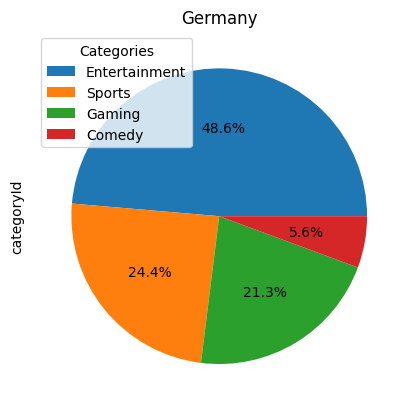

In [37]:
#Plotting a pie chart as done with United states' category values for comparison (for the region of Germany)
new_dedf= dedf.loc[dedf['categoryId'].isin(['Comedy','Sports','Gaming','Entertainment'])]
vals= new_dedf['categoryId'].value_counts()
#Plotting pie chart and adding legend
((vals/dedf.shape[0])*100).plot.pie(labels= None, autopct='%1.1f%%')
plt.title("Germany")
plt.legend(['Entertainment','Sports', 'Gaming','Comedy'], title = 'Categories', loc='upper left')

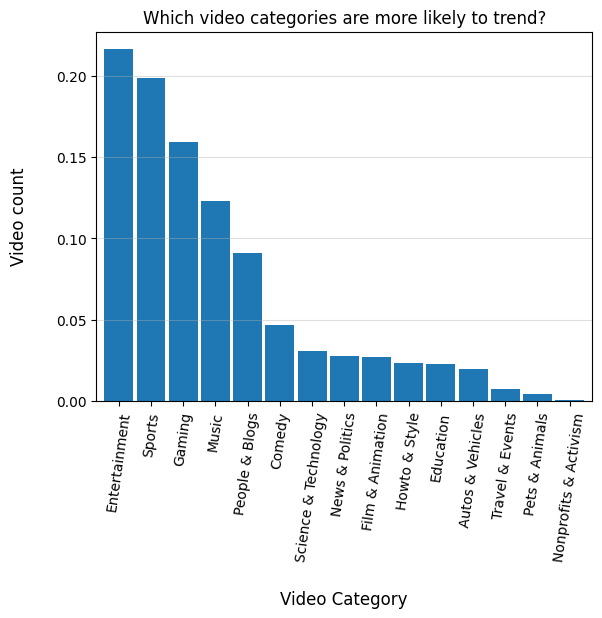

In [38]:
#Unitedkingdom
ukdf['categoryId'].replace(1, 'Film & Animation', inplace=True)
ukdf['categoryId'].replace(2, 'Autos & Vehicles', inplace=True)
ukdf['categoryId'].replace(10, 'Music', inplace=True)
ukdf['categoryId'].replace(15, 'Pets & Animals', inplace=True)
ukdf['categoryId'].replace(17, 'Sports', inplace=True)
ukdf['categoryId'].replace(19, 'Travel & Events', inplace=True)
ukdf['categoryId'].replace(20, 'Gaming', inplace=True)
ukdf['categoryId'].replace(22, 'People & Blogs', inplace=True)
ukdf['categoryId'].replace(23, 'Comedy', inplace=True)
ukdf['categoryId'].replace(24, 'Entertainment', inplace=True)
ukdf['categoryId'].replace(25, 'News & Politics', inplace=True)
ukdf['categoryId'].replace(26, 'Howto & Style', inplace=True)
ukdf['categoryId'].replace(27, 'Education', inplace=True)
ukdf['categoryId'].replace(28, 'Science & Technology', inplace=True)
ukdf['categoryId'].replace(29, 'Nonprofits & Activism', inplace=True)
ukdf['categoryId'].replace(30, 'Movies', inplace=True)

(ukdf['categoryId'].value_counts()/ukdf.shape[0]).plot.bar(width = 0.9)

plt.title('Which video categories are more likely to trend?')
plt.xlabel('Video Category', fontsize=12, labelpad=20)
plt.ylabel('Video count', fontsize = 12, labelpad= 20)
plt.grid(axis='y', alpha=0.4)
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 82)

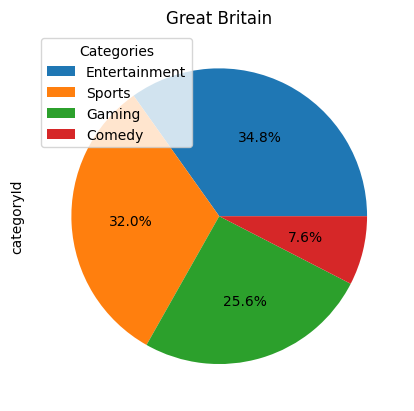

In [39]:
#Plotting a pie chart as done with United states' category values for comparison (for the region of United kingdom)
new_ukdf= ukdf.loc[ukdf['categoryId'].isin(['Comedy','Sports','Gaming','Entertainment'])]
vals= new_ukdf['categoryId'].value_counts()
#Plotting pie chart and adding legend
((vals/ukdf.shape[0])*100).plot.pie(labels= None, autopct='%1.1f%%')
plt.title("Great Britain")
plt.legend(['Entertainment','Sports', 'Gaming','Comedy'], title = 'Categories', loc='upper left')

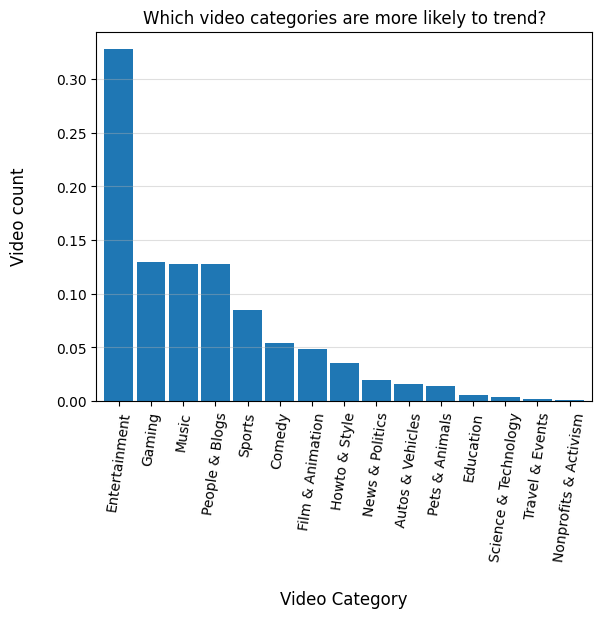

In [40]:
#Japan
jpndf['categoryId'].replace(1, 'Film & Animation', inplace=True)
jpndf['categoryId'].replace(2, 'Autos & Vehicles', inplace=True)
jpndf['categoryId'].replace(10, 'Music', inplace=True)
jpndf['categoryId'].replace(15, 'Pets & Animals', inplace=True)
jpndf['categoryId'].replace(17, 'Sports', inplace=True)
jpndf['categoryId'].replace(19, 'Travel & Events', inplace=True)
jpndf['categoryId'].replace(20, 'Gaming', inplace=True)
jpndf['categoryId'].replace(22, 'People & Blogs', inplace=True)
jpndf['categoryId'].replace(23, 'Comedy', inplace=True)
jpndf['categoryId'].replace(24, 'Entertainment', inplace=True)
jpndf['categoryId'].replace(25, 'News & Politics', inplace=True)
jpndf['categoryId'].replace(26, 'Howto & Style', inplace=True)
jpndf['categoryId'].replace(27, 'Education', inplace=True)
jpndf['categoryId'].replace(28, 'Science & Technology', inplace=True)
jpndf['categoryId'].replace(29, 'Nonprofits & Activism', inplace=True)
jpndf['categoryId'].replace(30, 'Movies', inplace=True)

(jpndf['categoryId'].value_counts()/jpndf.shape[0]).plot.bar(width = 0.9)

plt.title('Which video categories are more likely to trend?')
plt.xlabel('Video Category', fontsize=12, labelpad=20)
plt.ylabel('Video count', fontsize = 12, labelpad= 20)
plt.grid(axis='y', alpha=0.4)
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 82)

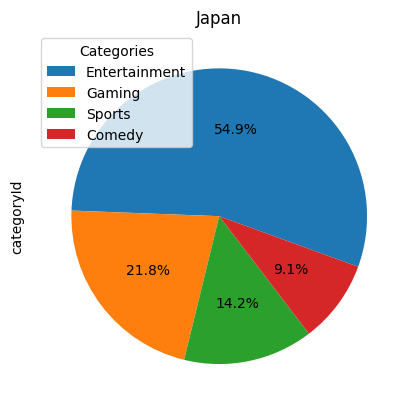

In [41]:
#Plotting a pie chart as done with United states' category values for comparison (for the region of Japan)
new_jpndf= jpndf.loc[jpndf['categoryId'].isin(['Comedy','Sports','Gaming','Entertainment'])]
vals= new_jpndf['categoryId'].value_counts()
#Plotting pie chart and adding legend
((vals/jpndf.shape[0])*100).plot.pie(labels= None, autopct='%1.1f%%', startangle=-20)
plt.title("Japan")
plt.legend(['Entertainment', 'Gaming','Sports','Comedy'], title = 'Categories', loc='upper left')

In [42]:
#Comparing trending videos in the US to the 3 other regions
test=pd.DataFrame()
#Looking for each US video id in other regions' 'video_id' columns and adding into new test datafram
test['existsuk']=usdf['video_id'].isin(ukdf['video_id'])
test['existsde']=usdf['video_id'].isin(dedf['video_id'])
test['existsjpn']=usdf['video_id'].isin(jpndf['video_id'])

#Calculating percentage found of each video and adding to new series
uk_perc=((test['existsuk']==True).sum())/ukdf['video_id'].shape[0]
de_perc=((test['existsde']==True).sum())/dedf['video_id'].shape[0]
jpn_perc=((test['existsjpn']==True).sum())/jpndf['video_id'].shape[0]
x={'United kingdom':uk_perc, 'Germany':de_perc, 'Japan': jpn_perc}
y=pd.Series(x)
y


United kingdom    0.514326
Germany           0.217221
Japan             0.030170
dtype: float64